(-0.5, 7.5, 7.5, -0.5)

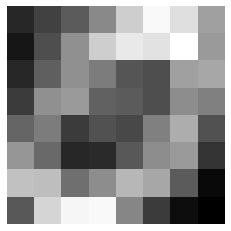

In [1]:
import numpy as np
import scipy.special as sc
from matplotlib import pyplot as plt
from math import e
Y = np.loadtxt('binarydigits.txt')

# My code as per below
X = Y.T
# Create log likelihood function that we will look to maximise (as positive as possible)
# This looks to tackle each parameter by itself and look through all the 100 data points of each parameter and then optimise p such as to maximise the log likelihood equation given by sum(ln_prob_bern).  Given this is a binary data set, it is not suitable to use gradient descent unless we use some sort of sigmoid function with it.  Alternatively, we can solve it analytically through the use of Y.sum(axis=0)/100 where we find the mean of each parameter as its maximum likelihood estimator
ln_prob_bern = lambda x,p,alpha,beta: x* np.log(p) + (1.0-x)*np.log(1.-p)
def iterate_p_for_params(log_likelihood_func,X,alpha=1,beta=1):
    output = []
    for param in X:
        holder = []
        for increment in range(1,100):
            p = increment/100.0
            new = sum(log_likelihood_func(param,p,alpha,beta))
            # Initialise the value of p
            if not holder:
                holder=[new,p]
            # Retain the value of p that maximises the function
            if new>holder[0]:
                holder=[new,p]
        output.append(holder)
    return output

ML = iterate_p_for_params(ln_prob_bern,X)

plt.figure()
plt.imshow(np.reshape(list(zip(*ML))[1], (8,8)),
           interpolation="None",
           cmap='gray')
plt.axis('off')

In [2]:
# Create log likelihood function that we will look to maximise (as positive as possible)
ln_prob_bern_beta = lambda x,p,alpha,beta: x* np.log(p) \
+ (1.0-x)*np.log(1.-p) \
- np.log(sc.beta(alpha,beta)) \
+ (alpha-1) * np.log(p) \
+ (beta-1) * np.log(1-p)

(-0.5, 7.5, 7.5, -0.5)

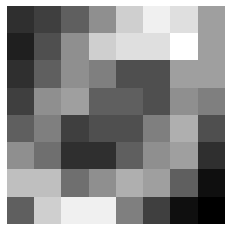

In [18]:
MAP = iterate_p_for_params(ln_prob_bern_beta,X,3,3)

plt.figure()
plt.imshow(np.reshape(list(zip(*MAP))[1], (8,8)),
           interpolation="None",
           cmap='gray')
plt.axis('off')

In [19]:
for i,j in zip(list(zip(*ML))[1],list(zip(*MAP))[1]):
    print(i,j,i-j)

0.13 0.43 -0.3
0.21 0.44 -0.23
0.29 0.46 -0.17000000000000004
0.43 0.49 -0.06
0.64 0.53 0.10999999999999999
0.77 0.55 0.21999999999999997
0.69 0.54 0.1499999999999999
0.5 0.5 0.0
0.08 0.42 -0.33999999999999997
0.25 0.45 -0.2
0.45 0.49 -0.03999999999999998
0.64 0.53 0.10999999999999999
0.72 0.54 0.17999999999999994
0.7 0.54 0.15999999999999992
0.79 0.56 0.22999999999999998
0.48 0.5 -0.020000000000000018
0.13 0.43 -0.3
0.3 0.46 -0.16000000000000003
0.45 0.49 -0.03999999999999998
0.39 0.48 -0.08999999999999997
0.27 0.45 -0.18
0.25 0.45 -0.2
0.5 0.5 0.0
0.52 0.5 0.020000000000000018
0.19 0.44 -0.25
0.45 0.49 -0.03999999999999998
0.48 0.5 -0.020000000000000018
0.31 0.46 -0.15000000000000002
0.29 0.46 -0.17000000000000004
0.25 0.45 -0.2
0.44 0.49 -0.04999999999999999
0.4 0.48 -0.07999999999999996
0.32 0.46 -0.14
0.39 0.48 -0.08999999999999997
0.19 0.44 -0.25
0.26 0.45 -0.19
0.23 0.45 -0.22
0.4 0.48 -0.07999999999999996
0.54 0.51 0.030000000000000027
0.26 0.45 -0.19
0.47 0.49 -0.0200000000000

In [24]:
'''
For probability of Situation A'''
ln_prob_bern_p_fixed = lambda x,p,alpha,beta: x* np.log(p) \
+ (1.0-x)*np.log(1.-p) \
+ np.log(0.5)

'''For probability of Situation B'''
ln_prob_bern_p_hat = lambda x,p,alpha,beta: x* np.log(p) \
+ (1.0-x)*np.log(1.-p) \
+ x* np.log(alpha)\
+ (1.0-x)*np.log(1.-alpha) 

'''For probability of Situation C'''
ln_prob_bern_p_normal = lambda x,p,p_prior: x* np.log(p) \
+ (1.0-x)*np.log(1.-p) \
+x * np.log(p_prior)\
+ (1.0-x)*np.log(1.-p_prior) 


In [27]:
A = iterate_p_for_params(ln_prob_bern_p_fixed,X)
B = iterate_p_for_params(ln_prob_bern_p_hat,X,np.random.rand())

prior = sum(Y)/100

output = []
for i, param in enumerate(X):
    holder = []
    for increment in range(1,100):
        p = increment/100.0
        new = sum(ln_prob_bern_p_normal(param,p,prior[i]))
#         print(new,sum(ln_prob_bern(param,p)))
        # Initialise the value of p
        if not holder:
            holder=[new,p]
        # Retain the value of p that maximises the function
        if new>holder[0]:
            holder=[new,p]
    output.append(holder)
C = output
for i,j in zip(list(zip(*ML))[1],list(zip(*B))[1]):
    print(i,j,i-j)

0.13 0.13 0.0
0.21 0.21 0.0
0.29 0.29 0.0
0.43 0.43 0.0
0.64 0.64 0.0
0.77 0.77 0.0
0.69 0.69 0.0
0.5 0.5 0.0
0.08 0.08 0.0
0.25 0.25 0.0
0.45 0.45 0.0
0.64 0.64 0.0
0.72 0.72 0.0
0.7 0.7 0.0
0.79 0.79 0.0
0.48 0.48 0.0
0.13 0.13 0.0
0.3 0.3 0.0
0.45 0.45 0.0
0.39 0.39 0.0
0.27 0.27 0.0
0.25 0.25 0.0
0.5 0.5 0.0
0.52 0.52 0.0
0.19 0.19 0.0
0.45 0.45 0.0
0.48 0.48 0.0
0.31 0.31 0.0
0.29 0.29 0.0
0.25 0.25 0.0
0.44 0.44 0.0
0.4 0.4 0.0
0.32 0.32 0.0
0.39 0.39 0.0
0.19 0.19 0.0
0.26 0.26 0.0
0.23 0.23 0.0
0.4 0.4 0.0
0.54 0.54 0.0
0.26 0.26 0.0
0.47 0.47 0.0
0.33 0.33 0.0
0.13 0.13 0.0
0.14 0.14 0.0
0.28 0.28 0.0
0.44 0.44 0.0
0.48 0.48 0.0
0.17 0.17 0.0
0.6 0.6 0.0
0.59 0.59 0.0
0.35 0.35 0.0
0.44 0.44 0.0
0.57 0.57 0.0
0.52 0.52 0.0
0.29 0.29 0.0
0.04 0.04 0.0
0.28 0.28 0.0
0.66 0.66 0.0
0.76 0.76 0.0
0.77 0.77 0.0
0.42 0.42 0.0
0.19 0.19 0.0
0.05 0.05 0.0
0.01 0.01 0.0


C:\Users\thayy\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\thayy\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


In [28]:
prob_a = list(zip(*A))[1]
prob_b = list(zip(*B))[1]
prob_c = list(zip(*C))[1]

In [29]:
def ln_prob(weight):
    prob=0
    for p,x in zip(weight,Y.sum(axis=0)):
        prob+= x*np.log(p)+(100-x)*np.log(1-p)
    return prob 

In [30]:
performance_a = ln_prob(prob_a)
performance_b =  ln_prob(prob_b)
performance_c =  ln_prob(prob_c)
print("The ln prob of Model A,B and C are {:.2f},{:.2f} and {:.2f} respectively".format(performance_a,performance_b,performance_c))

The ln prob of Model A,B and C are -3708.06,-3708.06 and -3708.06 respectively


In [15]:
test = iterate_p_for_params(ln_prob_bern_beta,X,1,1)
for i,j in zip(list(zip(*A))[1],list(zip(*test))[1]):
    print(i,j,i-j)

0.13 0.13 0.0
0.21 0.21 0.0
0.29 0.29 0.0
0.43 0.43 0.0
0.64 0.64 0.0
0.77 0.77 0.0
0.69 0.69 0.0
0.5 0.5 0.0
0.08 0.08 0.0
0.25 0.25 0.0
0.45 0.45 0.0
0.64 0.64 0.0
0.72 0.72 0.0
0.7 0.7 0.0
0.79 0.79 0.0
0.48 0.48 0.0
0.13 0.13 0.0
0.3 0.3 0.0
0.45 0.45 0.0
0.39 0.39 0.0
0.27 0.27 0.0
0.25 0.25 0.0
0.5 0.5 0.0
0.52 0.52 0.0
0.19 0.19 0.0
0.45 0.45 0.0
0.48 0.48 0.0
0.31 0.31 0.0
0.29 0.29 0.0
0.25 0.25 0.0
0.44 0.44 0.0
0.4 0.4 0.0
0.32 0.32 0.0
0.39 0.39 0.0
0.19 0.19 0.0
0.26 0.26 0.0
0.23 0.23 0.0
0.4 0.4 0.0
0.54 0.54 0.0
0.26 0.26 0.0
0.47 0.47 0.0
0.33 0.33 0.0
0.13 0.13 0.0
0.14 0.14 0.0
0.28 0.28 0.0
0.44 0.44 0.0
0.48 0.48 0.0
0.17 0.17 0.0
0.6 0.6 0.0
0.59 0.59 0.0
0.35 0.35 0.0
0.44 0.44 0.0
0.57 0.57 0.0
0.52 0.52 0.0
0.29 0.29 0.0
0.04 0.04 0.0
0.28 0.28 0.0
0.66 0.66 0.0
0.76 0.76 0.0
0.77 0.77 0.0
0.42 0.42 0.0
0.19 0.19 0.0
0.05 0.05 0.0
0.01 0.01 0.0


In [59]:
total_samples*np.log(0.5)

-4436.14195558365

In [60]:
total_heads = sum(sum(Y))
total_samples = Y.shape[0]*Y.shape[1]
total_heads*np.log(total_heads/total_samples)+(total_samples-total_heads)*np.log((total_samples-total_heads)/total_samples)

-4279.54011522343

In [61]:
lg_prob=0
for pixel in sum(Y):
    if pixel ==0:
        continue
    lg_prob+=pixel*np.log(pixel/100)+(100-pixel)*np.log(1-(pixel/100))
lg_prob

-3707.0555853455353

-3707.0555853455353